<img src="./images/Banner_NB.png">

# Exploring Titanic



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


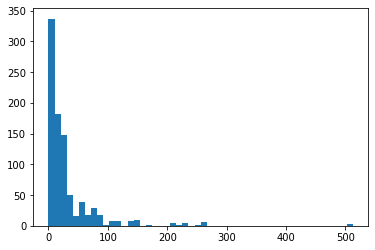

In [4]:
plt.hist(df.Fare, bins=50)
plt.xlabel=("Fare")
plt.ylabel=("Frequency")

In [5]:
sum(df.Fare>200)

20

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

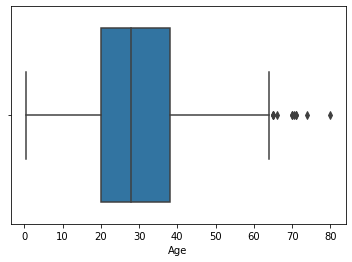

In [7]:
sns.boxplot(df.Age)

In [8]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
Q1 = np.percentile(df["Fare"], 25)
Q3 = np.percentile(df["Fare"], 75)
IQR = Q3 - Q1

In [10]:
Fare_outlier_rows = df[(df["Fare"] < Q1 - 1.5*IQR) | (df["Fare"] > Q3 + 1.5*IQR )].index

In [11]:
len(Fare_outlier_rows)

116

In [12]:
mycols = ["Age","Fare"]
all_outlier_rows = []
for col in mycols:        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        col_outlier = df[(df[col] < Q1 - IQR_range) | 
                              (df[col] > Q3 + IQR_range )].index
        all_outlier_rows.extend(col_outlier)
   
    

In [13]:
len(all_outlier_rows)

116

In [14]:
len(set(all_outlier_rows))

116

In [15]:
z_score = (df["Fare"] - df["Fare"].mean()) / df["Fare"].std()

In [16]:
outliers = abs(z_score) > 3
sum(outliers)

20

In [17]:
min(df.Fare[outliers])

211.3375

In [18]:
df.Fare[df.Fare>200] = np.nan

In [19]:
df["Fare"].describe()

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

In [20]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [21]:
Q1 = np.percentile(df["Fare"], 25)
Q3 = np.percentile(df["Fare"], 75)
IQR = Q3 - Q1

In [22]:
df.Fare[(df["Fare"] < Q1 - 1.5*IQR) | (df["Fare"] > Q3 + 1.5*IQR )] = np.nan

In [23]:
df.Fare.count()

775

In [24]:
df = pd.read_csv('data/titanic.csv', header=0, sep=',') 

In [25]:
z_score = (df["Fare"] - df["Fare"].mean()) / df["Fare"].std()
outliers = abs(z_score) > 3
sum(outliers)

20

In [26]:
df.Fare[outliers] = np.nan